# Plots by the state with relative/absolute numbers of Microsoft AI buildings

In [1]:
import os
import json
import pandas as pd
import re
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


## Data preparation

### Definitions

In [2]:
# dictionary definitions

data_dic = {0: "blds_continent_data_18-23_ai.json",
            1: "blds_africa_states_18-23_ai.json",
            2: "blds_northamerica_states_18-23_ai.json",
            3: "blds_europe_states_18-23_ai.json",
            4: "blds_asia_states_18-23_ai.json",}
geojson_folder_dic = {0: "geojson-continent-states",
                      1: "geojson-africa-states",
                      2: "geojson-northamerica-states",
                      3: "geojson-europe-states",
                      4: "geojson-asia-states",}

In [3]:
# user input definition

while True:
    try:
        user_d_spec = int(input("Which data do you want to plot?\
                            Enter 0 for stats by continents (2018–2023),\
                            1 for stats by Africa states (2018–2023),\
                            2 for stats by North-Central America states (2018–2023),\
                            3 for stats by Europe states (2018–2023),\
                            4 for stats by Asia states (2018–2023):"
                                ))
    except ValueError:
        print("Please enter a number.")
        continue
    if user_d_spec not in range(len(data_dic)):
        print("Please enter 0, 1, 2, 3 or 4.")
        continue
    break


In [4]:
# function definitions

def data_spec(data_dic):

    try:
        with open(f"downloaded-data\\{data_dic[user_d_spec]}", "r") as f:
            data = json.load(f)
        return data
    except Exception as e:
        print(e)
        print("Please download the data first.")

def get_geojson_names(home_dir, geojson_folder_dic):
    geojson_dir = os.path.join(
        home_dir, f"geojson-regions\\{geojson_folder_dic}", "")

    geojson_names = []
    for (dir_path, dir_names, file_names) in os.walk(geojson_dir):
        geojson_names.extend(file_names)
    print(geojson_names)
    return geojson_names


### Load the data

In [5]:
os.chdir('..')

data = data_spec(data_dic)

home_dir = os.getcwd()


### Edit the obtained data into desired shape to create a DataFrame

In [6]:
d = {
    "feature": [],
    "source": [],
    "timestamp": [],
    "value": []
}


In [7]:
for cont in data:
    for dic1 in cont:
        feature, source = dic1["groupByObject"][0], dic1["groupByObject"][1]
        for res in dic1["result"]:
            d["feature"].append(feature)
            d["source"].append(source)
            d["timestamp"].append(res["timestamp"])
            d["value"].append(res["value"])

df = pd.DataFrame(d)
# df

In [8]:
# extract only the year
df["year"] = pd.to_datetime(df["timestamp"]).dt.year

In [9]:
# set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [10]:
# reset display options
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")


In [11]:
df.dtypes

feature        int64
source        object
timestamp     object
value        float64
year           int64
dtype: object

In [12]:
# handle wrong feature name of Egypt

# if user_d_spec == 1:
#     df.loc[df["feature"] == "feature1", "feature"] = 46


In [13]:
# df

### Append the names of the regions to the DataFrame

In [14]:
# extract the geojson IDs and the names
geojson_names = get_geojson_names(home_dir, geojson_folder_dic[user_d_spec])


['0_Costa Rica.geojson', '10_Mexico.geojson', '11_Belize.geojson', '12_Panama.geojson', '13_Bahamas.geojson', '14_Trinidad and Tobago.geojson', '15_Grenada.geojson', '16_St. Vin. and Gren..geojson', '17_Barbados.geojson', '18_Saint Lucia.geojson', '19_Dominica.geojson', '1_Nicaragua.geojson', '20_Antigua and Barb..geojson', '21_St. Kitts and Nevis.geojson', '22_Jamaica.geojson', '23_Bajo Nuevo Bank.geojson', '24_Serranilla Bank.geojson', '2_Haiti.geojson', '3_Dominican Rep..geojson', '4_El Salvador.geojson', '5_Guatemala.geojson', '6_Cuba.geojson', '7_Honduras.geojson', '8_United States of America.geojson', '9_Canada.geojson']


In [15]:
geojson_names_2 = geojson_names

id_name_dic = {int(re.search(r'^\d+', k)[0]): re.search(r'\_.+\.', v)[0][1:-1] # using lib RegularExpression to separate the ID number and the state name
                for k, v in zip(geojson_names, geojson_names_2)}
id_name_ser = pd.Series(id_name_dic)
id_name_df = pd.DataFrame(id_name_ser, columns=["name"])
id_name_df = id_name_df.reset_index().rename(columns={"index": "id"})
id_name_df["id"] = id_name_df["id"].astype(int)
# id_name_df


In [16]:
# merge df with region names based on IDs
df = df.merge(id_name_df, how="left", left_on="feature",
               right_on="id")
# df.head(20)

In [17]:
df

,feature,source,timestamp,value,year,id,name
0,0,remainder,2018-01-01T00:00:00Z,61906.0,2018,0,Costa Rica
1,0,remainder,2019-01-01T00:00:00Z,76289.0,2019,0,Costa Rica
2,0,remainder,2020-01-01T00:00:00Z,86564.0,2020,0,Costa Rica
3,0,remainder,2021-01-01T00:00:00Z,106221.0,2021,0,Costa Rica
4,0,remainder,2022-01-01T00:00:00Z,134409.0,2022,0,Costa Rica
...,...,...,...,...,...,...,...
283,9,source=microsoft/BuildingFootprints,2019-01-01T00:00:00Z,0.0,2019,9,Canada
284,9,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0,2020,9,Canada
285,9,source=microsoft/BuildingFootprints,2021-01-01T00:00:00Z,39290.0,2021,9,Canada
286,9,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,110173.0,2022,9,Canada


### Filtering the data

In [18]:
# get the number of AI Microsoft (source=microsoft/BuildingFootprints) / manually mapped (remainder) buildings for every year
grouped = df.groupby(["name", "year"])["value"].sum()
# grouped

In [19]:
grouped


name                      year
Antigua and Barb.         2018       38555.0
                          2019       38930.0
                          2020       39053.0
                          2021       38941.0
                          2022       39085.0
                                     ...    
United States of America  2019    27680676.0
                          2020    33284840.0
                          2021    40888985.0
                          2022    49029980.0
                          2023    57901774.0
Name: value, Length: 150, dtype: float64

In [20]:
# merge the DataFrame with groupBy DataFrame and compute the percentage
merged_data = df.merge(grouped, on=["name", "year"], how="left", )
merged_data = merged_data.rename(columns={"value_x":"num_of_blds", "value_y":"total_blds"})
merged_data["percentage"] = (merged_data["num_of_blds"] / merged_data["total_blds"]) * 100
# merged_data.head(10)


In [21]:
# percentage verification
merged_data.groupby(["name", "year"])["percentage"].sum()


name                      year
Antigua and Barb.         2018    100.0
                          2019    100.0
                          2020    100.0
                          2021    100.0
                          2022    100.0
                                  ...  
United States of America  2019    100.0
                          2020    100.0
                          2021    100.0
                          2022    100.0
                          2023    100.0
Name: percentage, Length: 150, dtype: float64

In [22]:
df_ai_rel = merged_data.loc[(merged_data["year"] == 2023) & (merged_data["source"] == "source=microsoft/BuildingFootprints") & (merged_data["percentage"] > 0.3), :]
df_ai_rel.head()


,feature,source,timestamp,num_of_blds,year,id,name,total_blds,percentage
47,12,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,2438.0,2023,12,Panama,161129.0,1.513073
227,4,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,2100.0,2023,4,El Salvador,262745.0,0.799254
251,6,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,14652.0,2023,6,Cuba,368783.0,3.973068
263,7,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,4054.0,2023,7,Honduras,680979.0,0.595319
275,8,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,8366550.0,2023,8,United States of America,57901774.0,14.449557


In [23]:
len(df_ai_rel)


6

In [24]:
df_ai_rel


,feature,source,timestamp,num_of_blds,year,id,name,total_blds,percentage
47,12,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,2438.0,2023,12,Panama,161129.0,1.513073
227,4,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,2100.0,2023,4,El Salvador,262745.0,0.799254
251,6,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,14652.0,2023,6,Cuba,368783.0,3.973068
263,7,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,4054.0,2023,7,Honduras,680979.0,0.595319
275,8,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,8366550.0,2023,8,United States of America,57901774.0,14.449557
287,9,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,162750.0,2023,9,Canada,5801348.0,2.805382


In [25]:
# Africa 5, America 0.3
df_ai_rel = df_ai_rel.loc[df_ai_rel["percentage"] > 0.3, :]


### Plots

#### Relative numbers

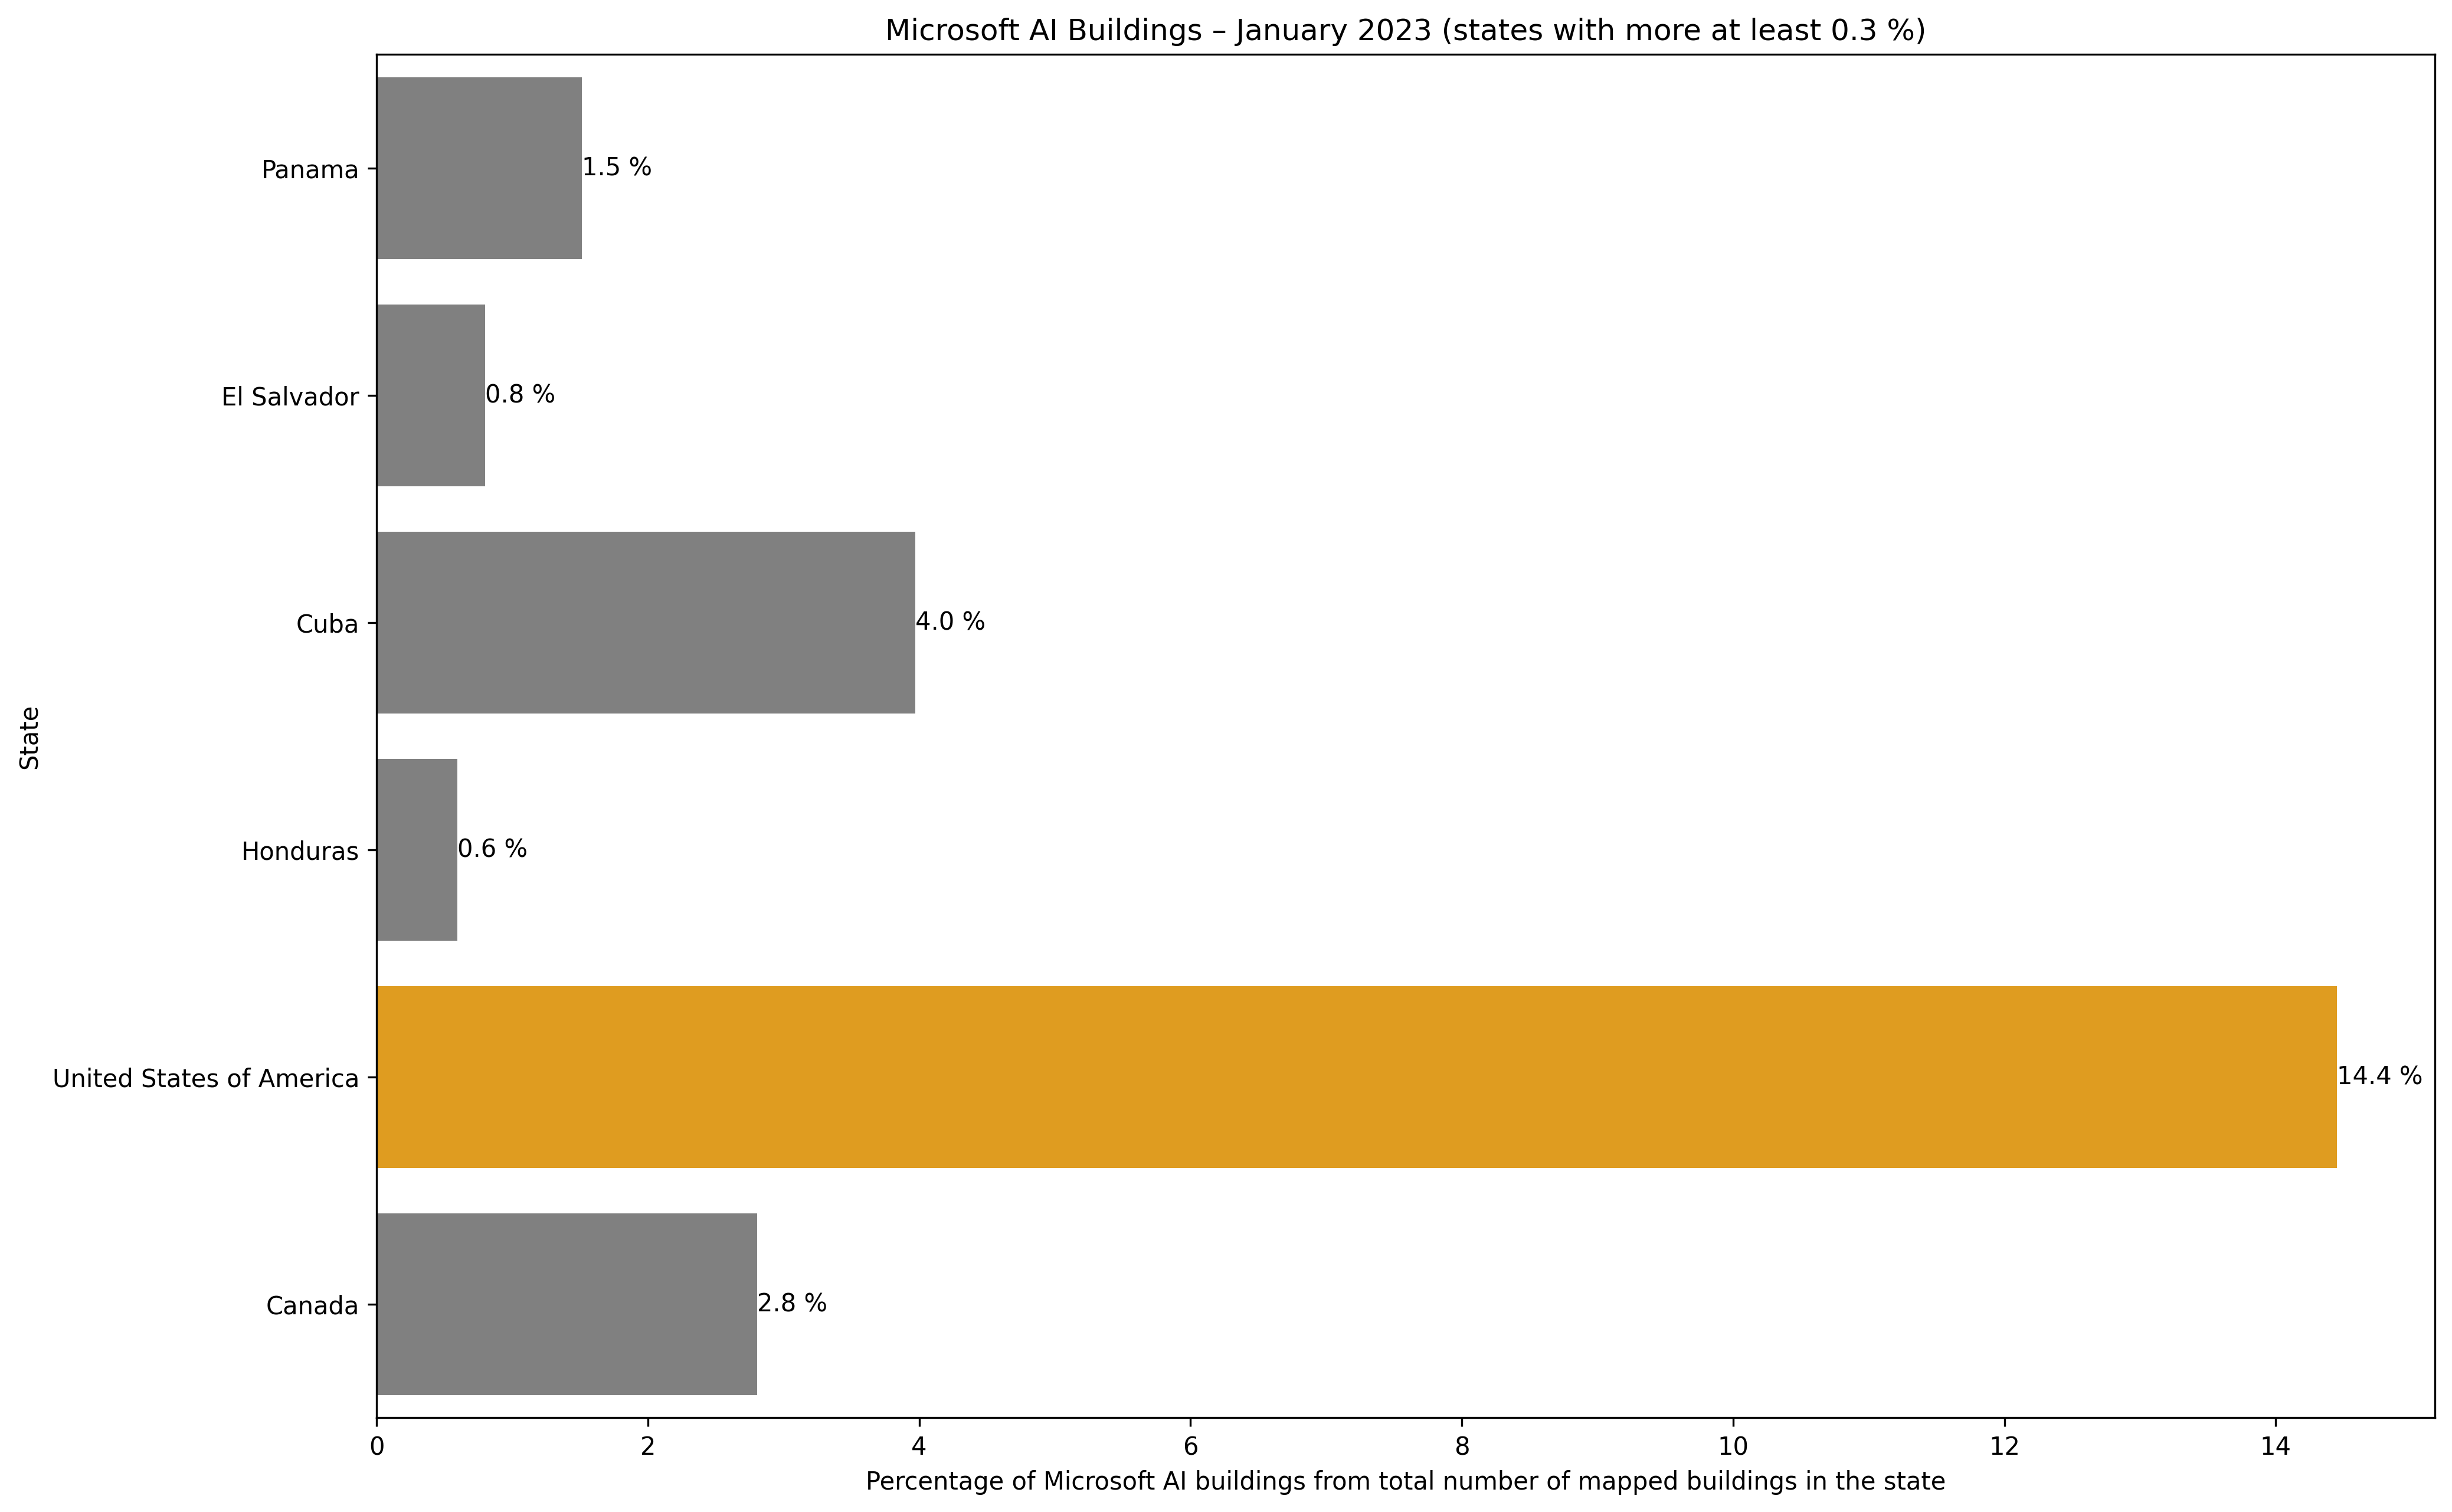

In [26]:
fig, ax = plt.subplots(figsize=(15, 10), dpi=300)

# use orange for bar with max value and grey for all other bars
cols = ['grey' if (x < max(df_ai_rel["percentage"]))
        else 'orange' for x in df_ai_rel["percentage"]]

# create horizontal barplot
sns.barplot(x=df_ai_rel["percentage"], y=df_ai_rel["name"], orient='h', palette=cols, ax=ax)


# add percentage labels
for i, percent in enumerate(df_ai_rel["percentage"]):
    if np.isfinite(percent):
        ax.text(percent, i, str(round(percent, 1)) +
                ' %', ha='left', va='center')
        
# Set axis labels and title
ax.set_xlabel('Percentage of Microsoft AI buildings from total number of mapped buildings in the state')
ax.set_ylabel('State')
ax.set_title('Microsoft AI Buildings – January 2023 (states with more at least 0.3 %)')

plt.show()



#### Absolute numbers

In [27]:
df_ai_abs = merged_data.loc[(merged_data["year"] == 2023) & (merged_data["source"] == "source=microsoft/BuildingFootprints") & (merged_data["num_of_blds"] > 100), :]
df_ai_abs.head()


,feature,source,timestamp,num_of_blds,year,id,name,total_blds,percentage
11,0,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,150.0,2023,0,Costa Rica,149432.0,0.100380
23,10,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,1698.0,2023,10,Mexico,2523609.0,0.067285
47,12,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,2438.0,2023,12,Panama,161129.0,1.513073
71,14,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,241.0,2023,14,Trinidad and Tobago,100442.0,0.239939
143,1,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,187.0,2023,1,Nicaragua,148830.0,0.125647


In [28]:
# Africa 150000, America 5000
df_ai_abs = df_ai_abs.loc[df_ai_abs["num_of_blds"] > 5000, :]


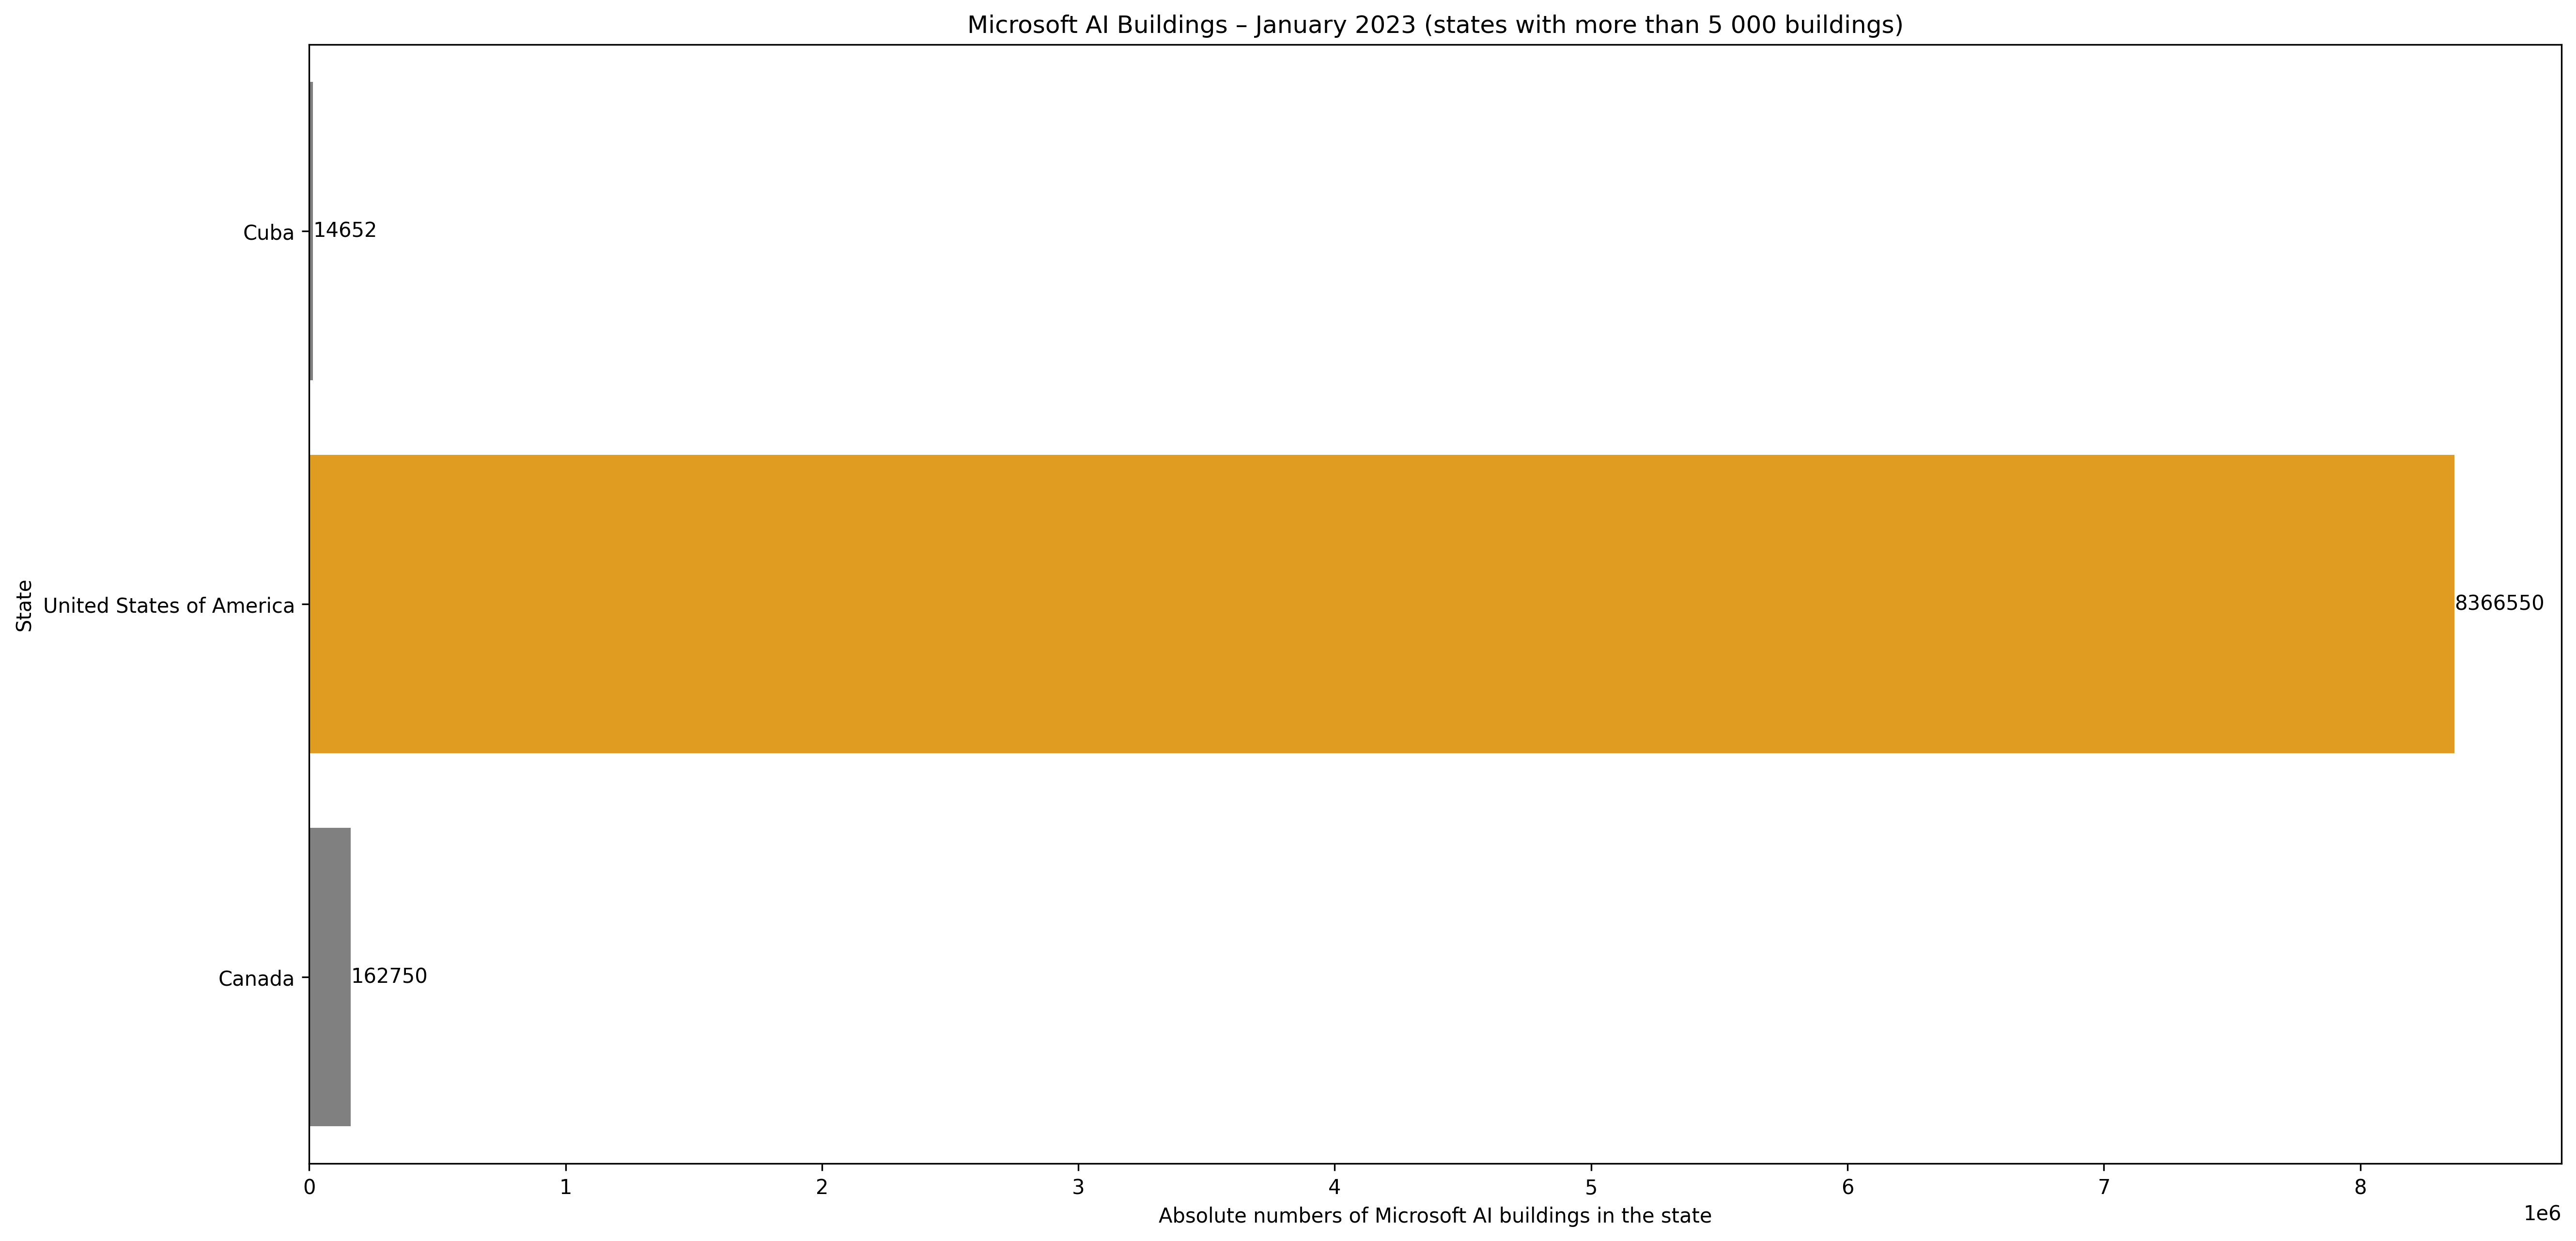

In [29]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)

# use orange for bar with max value and grey for all other bars
cols = ['grey' if (x < max(df_ai_abs["num_of_blds"]))
        else 'orange' for x in df_ai_abs["num_of_blds"]]

# create horizontal barplot
sns.barplot(x=df_ai_abs["num_of_blds"], y=df_ai_abs["name"], orient='h', palette=cols, ax=ax)


# add percentage labels
for i, num in enumerate(df_ai_abs["num_of_blds"]):
    if np.isfinite(num):
        ax.text(num, i, str(int(num)), ha='left', va='center')

# Set axis labels and title
ax.set_xlabel('Absolute numbers of Microsoft AI buildings in the state')
ax.set_ylabel('State')
ax.set_title(
    'Microsoft AI Buildings – January 2023 (states with more than 5 000 buildings)')

plt.show()


#### Plotly lib

In [30]:
# Create the horizontal percentage bar chart
fig = px.bar(df_ai_rel, x='percentage', y='name', orientation='h')

# Set the x-axis limit to 100
fig.update_xaxes(range=[0, 100])

# Customize the chart
fig.update_traces(marker_color='skyblue', marker_line_color='black',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title='Percentage of Microsoft AI buildings from total number of mapped buildings in the state',
                  xaxis_title='Percentage of Microsoft AI buildings from total number of mapped buildings in the state',
                  yaxis_title='State',
                  height=1000)

# Display the chart
fig.show()
